In [1]:
import numpy as np
import matplotlib.pyplot as plot
import random
import time
import h5py
from scipy.signal import find_peaks


In [2]:
filename = "/sdf/data/lcls/ds/xcs/xcsx48919/hdf5/smalldata/xcsx48919_Run0146.h5"

exp = 'xcsx48919'
run = 146

f = h5py.File(filename,'r')


def print_name(name, obj):
    if isinstance(obj, h5py.Dataset):
        print('Dataset:', name)
    elif isinstance(obj, h5py.Group):
        print('Group:', name)

with h5py.File(filename, 'r')  as h5f: # file will be closed when we exit from WITH scope
    h5f.visititems(print_name) # print all structure names

Group: Sums
Dataset: Sums/acq01_calib
Dataset: Sums/acq01_calib_dropped
Dataset: Sums/acq01_calib_dropped_square
Group: UserDataCfg
Group: UserDataCfg/EOrbits
Dataset: UserDataCfg/EOrbits/detname
Dataset: UserDataCfg/EOrbits/name
Group: UserDataCfg/acq01
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_bound
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_name
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_writeArea
Dataset: UserDataCfg/acq01/applyMask
Dataset: UserDataCfg/acq01/dataAccessTime
Dataset: UserDataCfg/acq01/delayTime
Dataset: UserDataCfg/acq01/fullScale
Dataset: UserDataCfg/acq01/interval
Dataset: UserDataCfg/acq01/maskCentral
Dataset: UserDataCfg/acq01/nSamples
Dataset: UserDataCfg/acq01/offset
Dataset: UserDataCfg/acq01/run
Group: UserDataCfg/damage
Dataset: UserDataCfg/damage/detAlias
Dataset: UserDataCfg/damage/detNames
Dataset: UserDataCfg/damage/name
Group: UserDataCfg/diodeGon
Dataset: UserDataCfg/diodeGon/detname
Dataset: UserDataCfg/diodeGon/name
Dataset: UserDataCfg/diodeGon/savePos
Gro

ipm [267668.25  263369.75  274009.625 ... 280239.375 269691.5   311127.   ]
acq01_data [[[ 0.22929688  0.24882813  0.2390625  ...  0.2390625   0.24882813
    0.        ]
  [-0.11962891 -0.13916016 -0.13427734 ... -0.16357422 -0.14892578
    0.        ]
  [ 0.04492188  0.03710938  0.04882812 ...  0.0390625   0.04345703
    0.        ]
  [-0.13964844 -0.14355469 -0.14160156 ... -0.13574219 -0.14160156
    0.        ]]

 [[ 0.25493164  0.25859375  0.24394531 ...  0.22441406  0.26835938
    0.        ]
  [-0.13916016 -0.16235352 -0.14892578 ... -0.12329102 -0.16845703
    0.        ]
  [ 0.04101562  0.0390625   0.04101562 ...  0.04345703  0.04345703
    0.        ]
  [-0.14160156 -0.14160156 -0.14990234 ... -0.14794922 -0.13183594
    0.        ]]

 [[ 0.23417969  0.22929688  0.24394531 ...  0.21953125  0.22929688
    0.        ]
  [-0.14404297 -0.11962891 -0.13916016 ... -0.13916016 -0.13427734
    0.        ]
  [ 0.04345703  0.04345703  0.046875   ...  0.04345703  0.05615234
    0.      

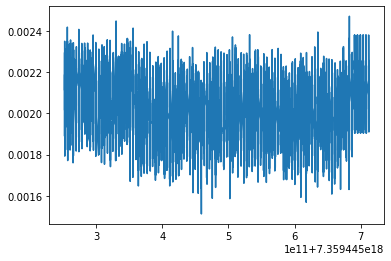

In [3]:
with h5py.File(filename, 'r')  as h5f: # file will be closed when we exit from WITH scope
    sums_acq01 = h5f['Sums/acq01_calib'][()]
    acq01_data = h5f['acq01/ROI_0_area'][()]
    acq01_mean = h5f['acq01/ROI_0_mean'][()]
    time = h5f['event_time'][()]
    ipm5 = h5f['UserDataCfg/damage/detNames'][()]
    ipm = h5f['ipm4/sum'][()]

#print("time", time[1:10000]) #10:110])
#print("acq01_data", acq01_data[1:1000]) #[10:110])
print("ipm", ipm)

acq_len = len(acq01_data)
print("acq01_data",acq01_data)
print("shape", acq01_data.shape) #first dimension is number of events, second dim is channel number, 3rd dim is waveform. At each event there is a trigger that then takes 4000 waveform lines
print("ipm len", len(ipm))
fig, ax1 = plot.subplots()
ax1.plot(time[1:],acq01_mean[1:]) 
#ax1.plot(time[1:],ipm[1:])

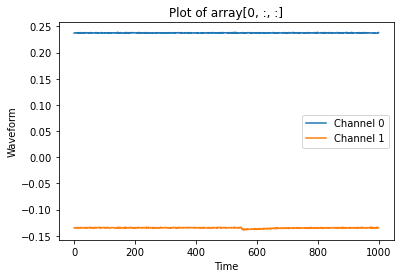

In [4]:
import matplotlib.pyplot as plt
#rolling average over n (100ish) events 
#identify the peaks and onset event
# Plot the data along the third dimension for all rows at a specific index in the first dimension


i = 0
j = 2000
k = 3500
#for i in range (0,1):
  # index along the first dimension
    #print("i", i)
    #for j in range(array.shape[1]):  # loop through the second dimension (4 rows)
waveforms_subset_0 = acq01_data[j:k, 0, :1000]
waveforms_subset_1 = acq01_data[j:k, 1, :1000]
average_waveform_0 = np.mean(waveforms_subset_0, axis=0)
average_waveform_1 = np.mean(waveforms_subset_1, axis=0)
plt.plot(average_waveform_0, label=f'Channel {0}')
plt.plot(average_waveform_1, label=f'Channel {1}')
    
    #plt.plot(acq01_data[i, 2, :], label=f'Channel {2}')
    #plt.plot(acq01_data[i, 3, :], label=f'Channel {3}')

plt.title(f'Plot of array[{i}, :, :]')
plt.xlabel('Time')
plt.ylabel('Waveform')
plt.legend()
plt.show()
#i = i + 1




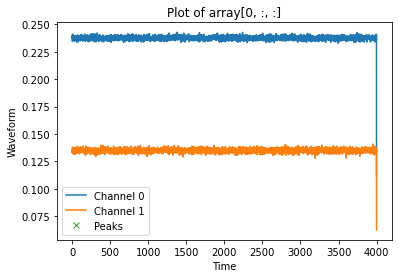

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 0


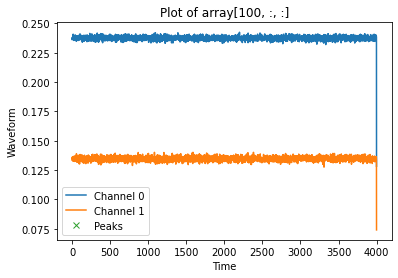

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 100


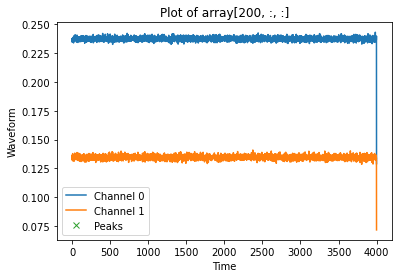

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 200


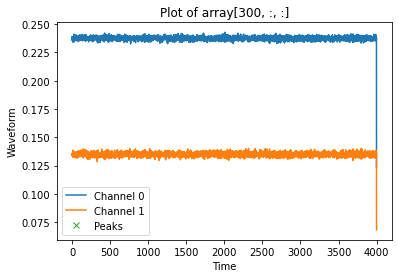

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 300


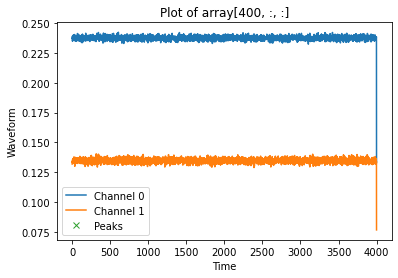

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 400


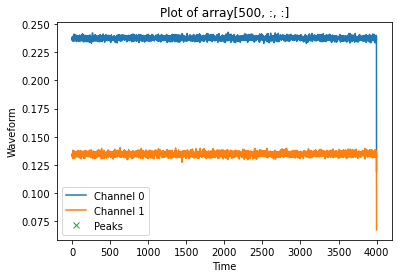

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 500


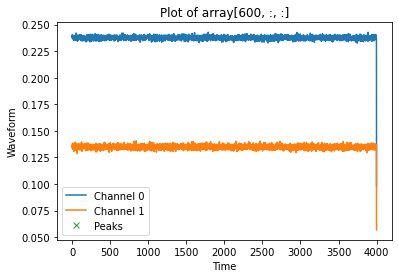

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 600


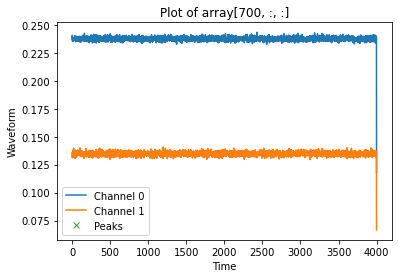

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 700


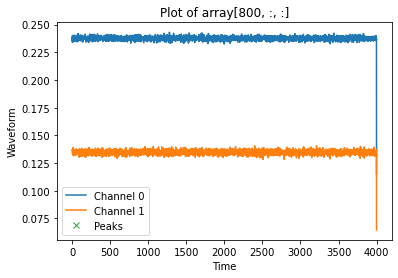

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 800


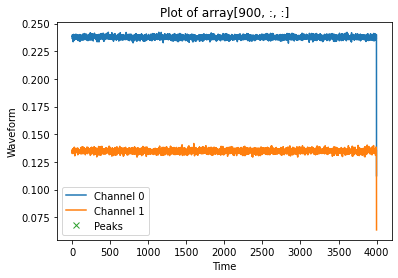

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 900


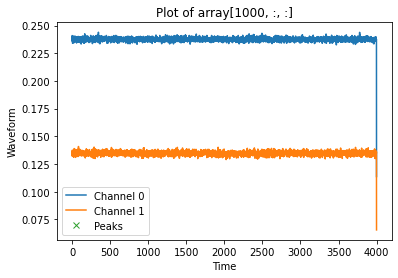

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 1000


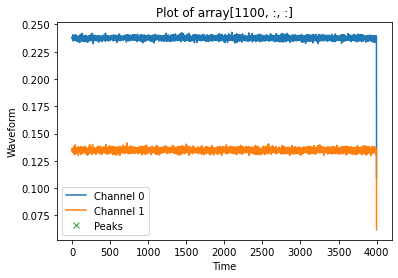

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 1100


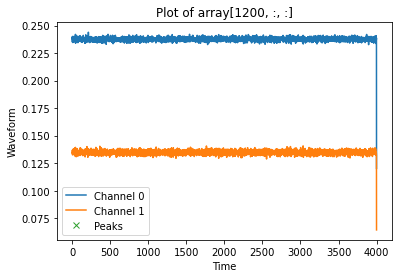

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 1200


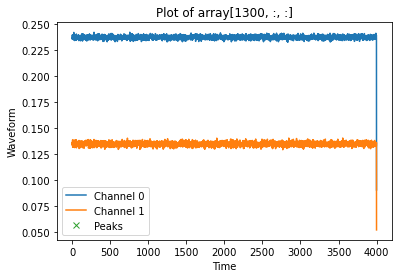

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 1300


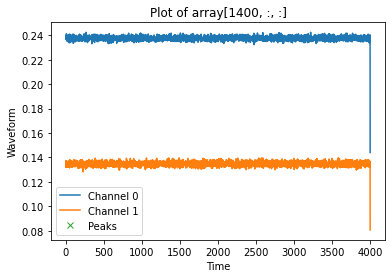

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 1400


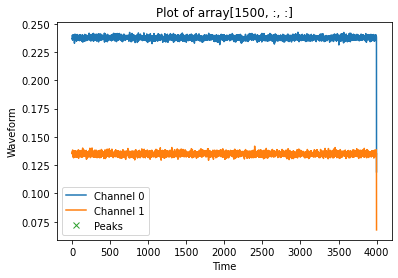

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 1500


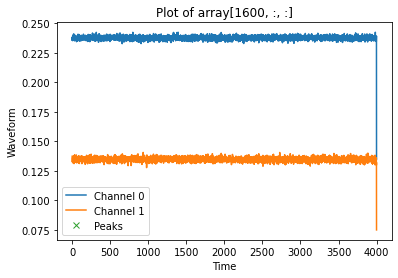

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 1600


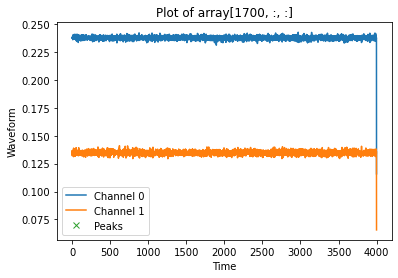

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 1700


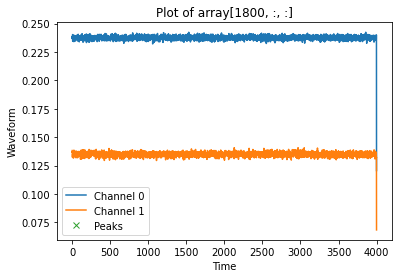

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 1800


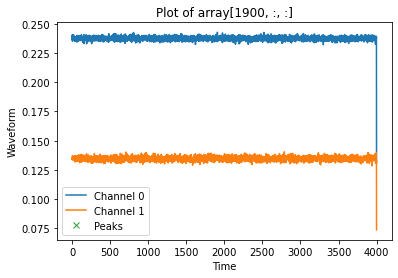

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 1900


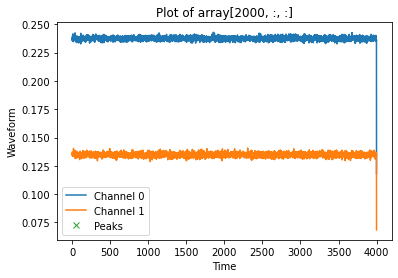

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 2000


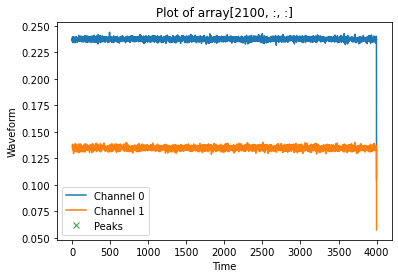

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 2100


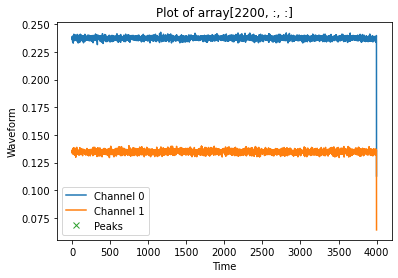

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 2200


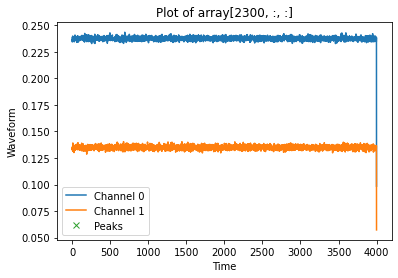

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 2300


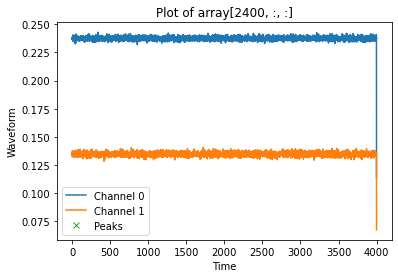

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 2400


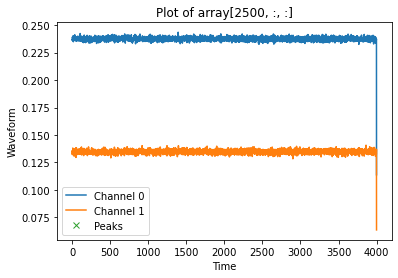

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 2500


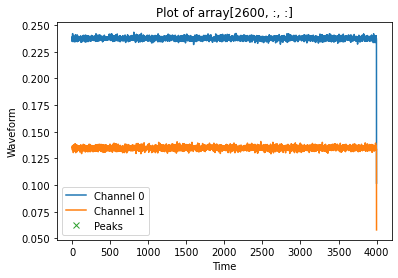

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 2600


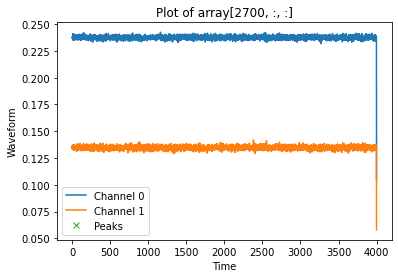

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 2700


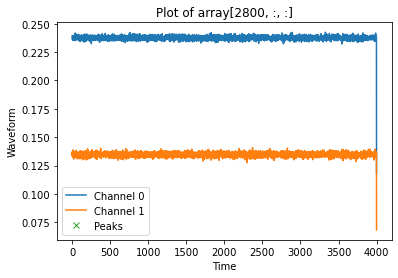

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 2800


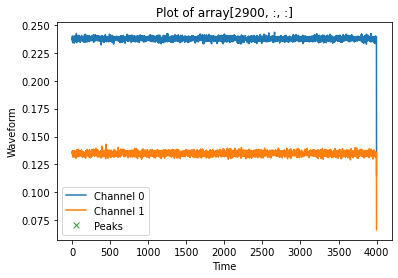

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 2900


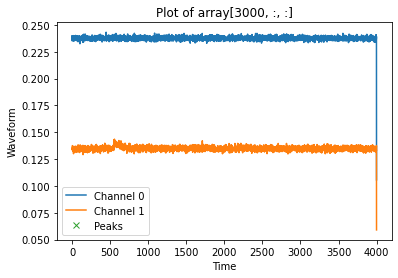

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 3000


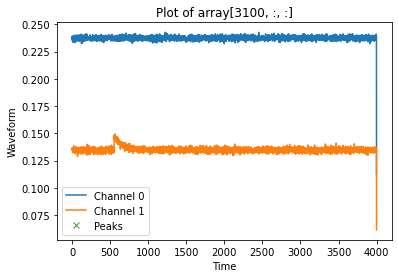

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 3100


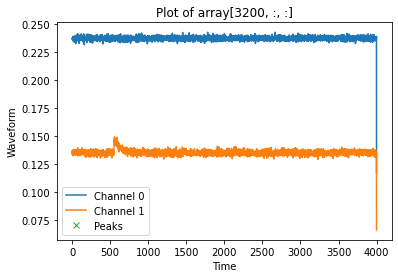

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 3200


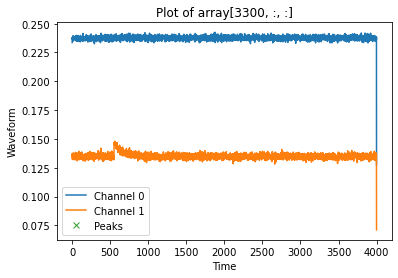

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 3300


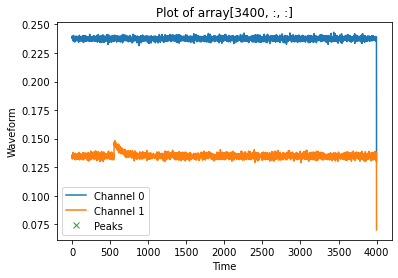

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 3400


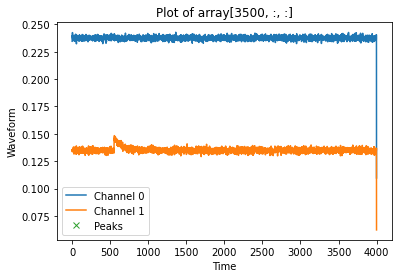

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 3500


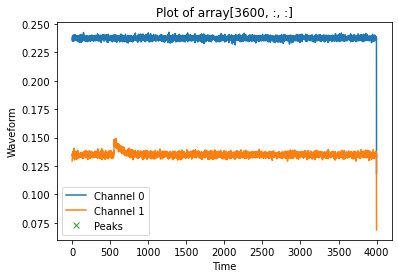

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 3600


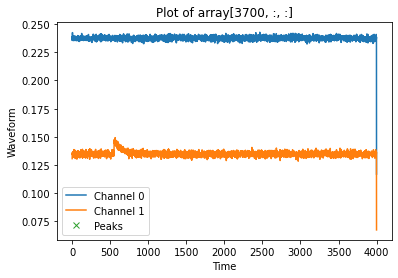

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 3700


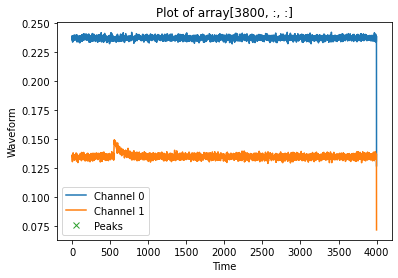

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 3800


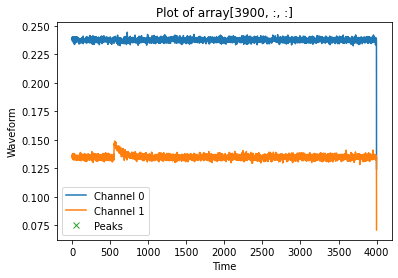

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 3900


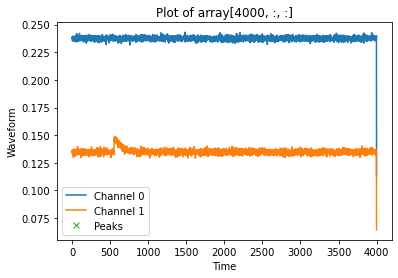

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 4000


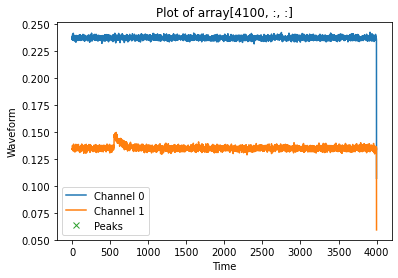

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 4100


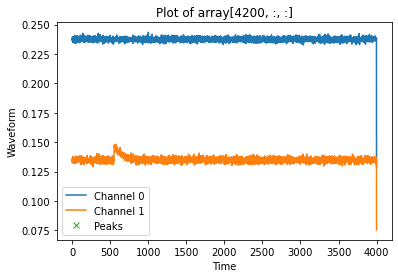

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 4200


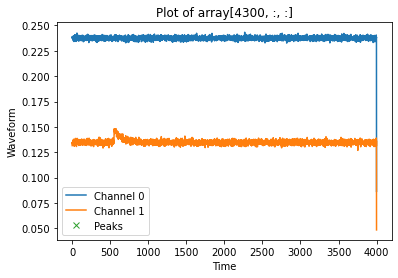

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 4300


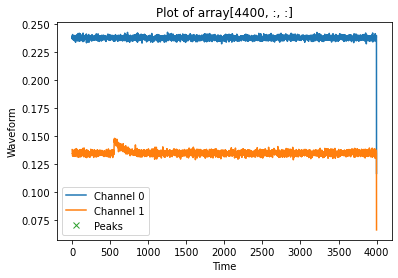

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 4400


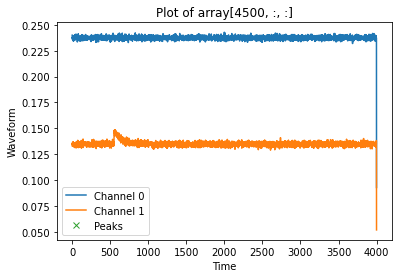

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 4500


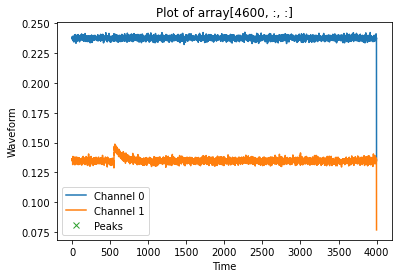

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 4600


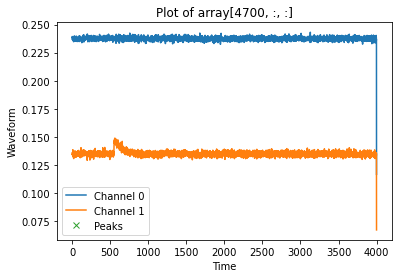

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 4700


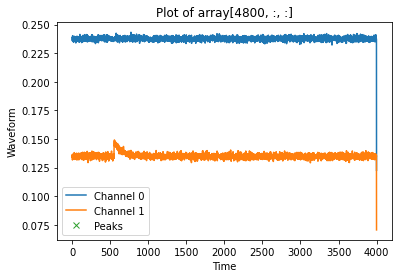

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 4800


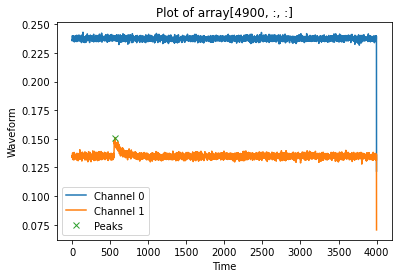

Indices of negative peaks: [564]
Values of negative peaks: [0.15109863]
Indices of event number: 4900


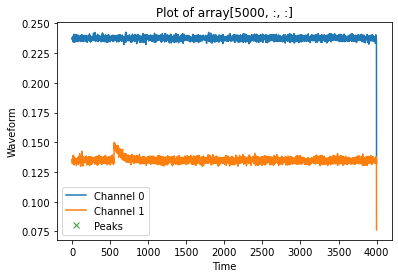

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 5000


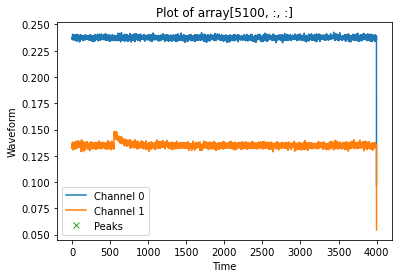

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 5100


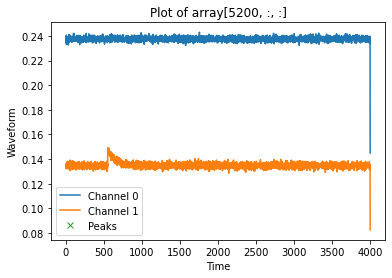

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 5200


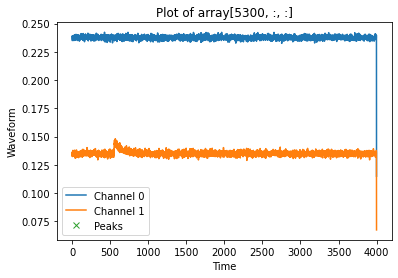

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 5300


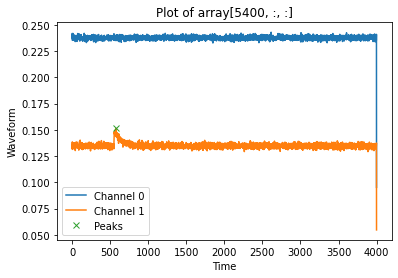

Indices of negative peaks: [575]
Values of negative peaks: [0.15126953]
Indices of event number: 5400


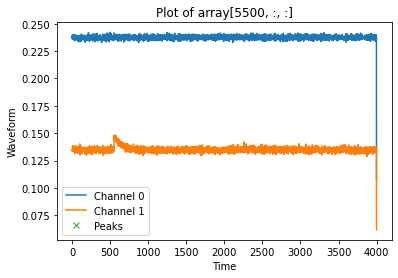

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 5500


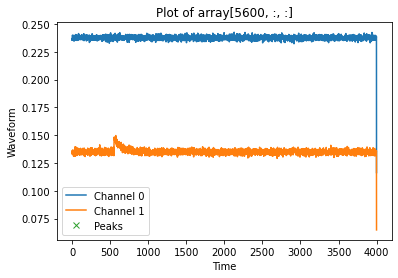

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 5600


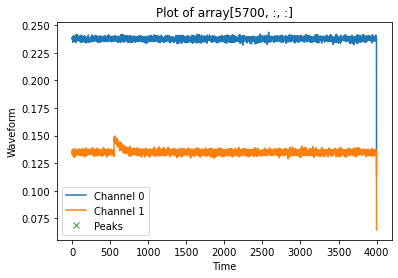

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 5700


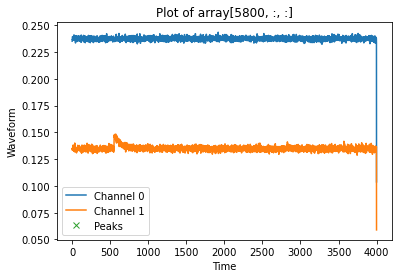

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 5800


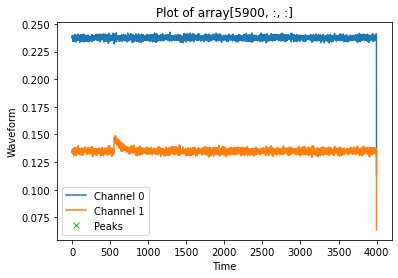

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 5900


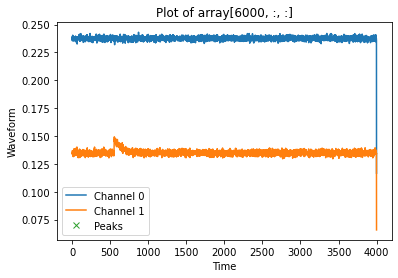

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 6000


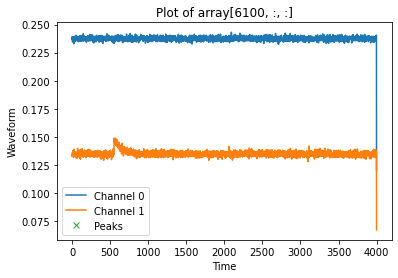

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 6100


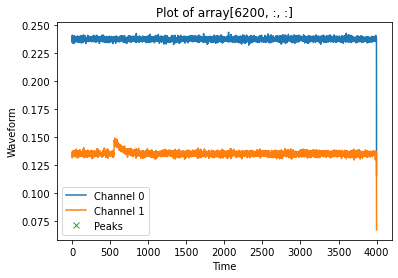

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 6200


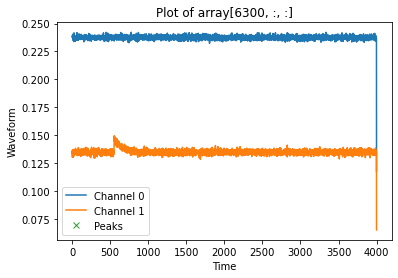

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 6300


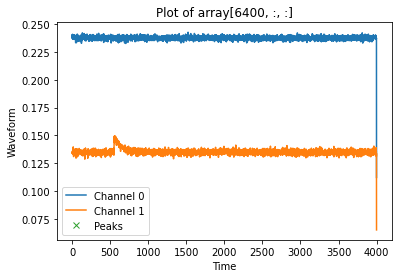

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 6400


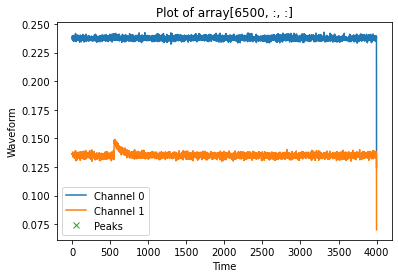

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 6500


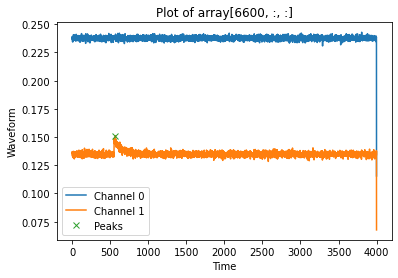

Indices of negative peaks: [568]
Values of negative peaks: [0.15112305]
Indices of event number: 6600


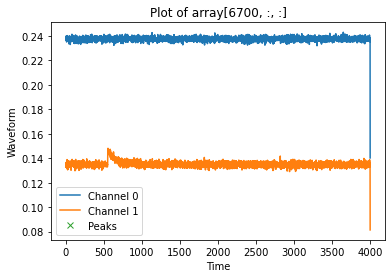

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 6700


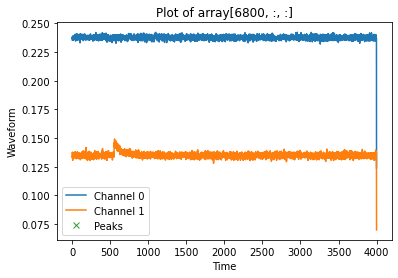

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 6800


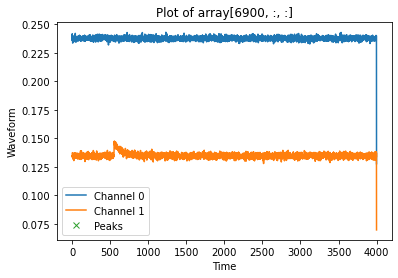

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 6900


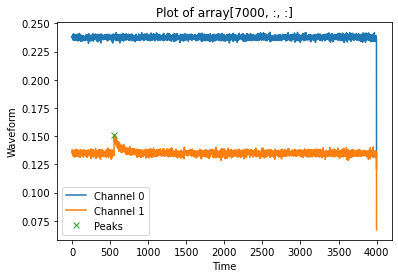

Indices of negative peaks: [555]
Values of negative peaks: [0.15113525]
Indices of event number: 7000


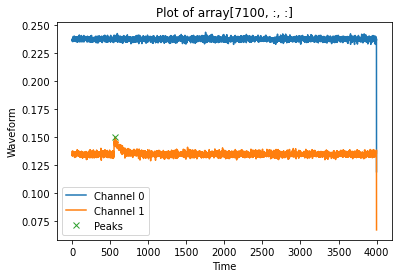

Indices of negative peaks: [566]
Values of negative peaks: [0.15003662]
Indices of event number: 7100


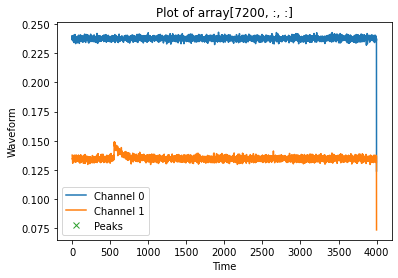

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 7200


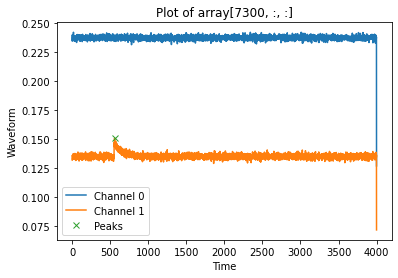

Indices of negative peaks: [557]
Values of negative peaks: [0.15074463]
Indices of event number: 7300


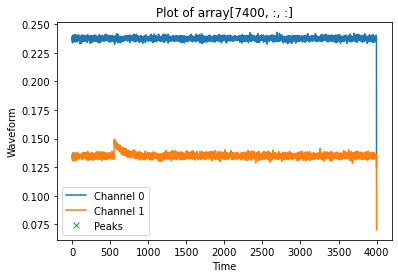

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 7400


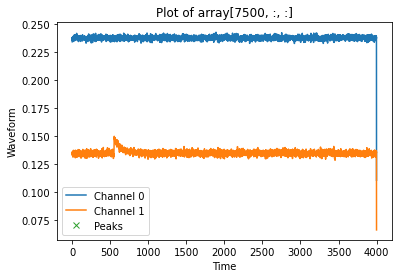

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 7500


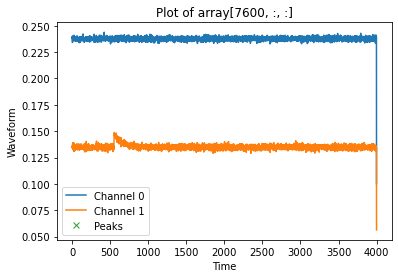

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 7600


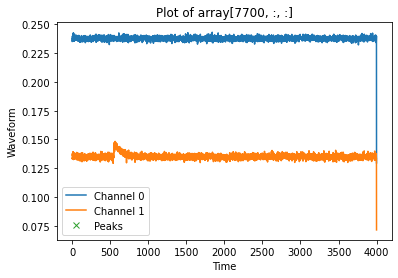

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 7700


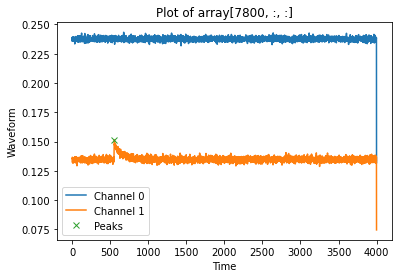

Indices of negative peaks: [555]
Values of negative peaks: [0.15137939]
Indices of event number: 7800


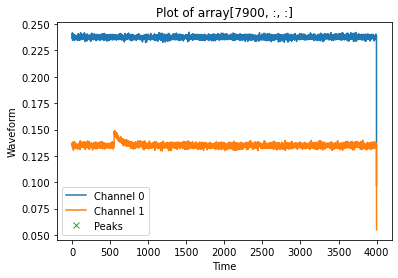

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 7900


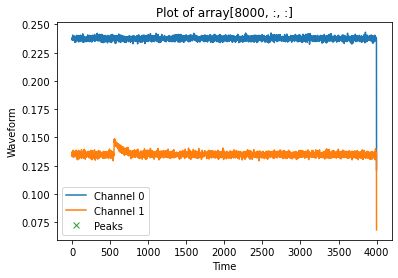

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 8000


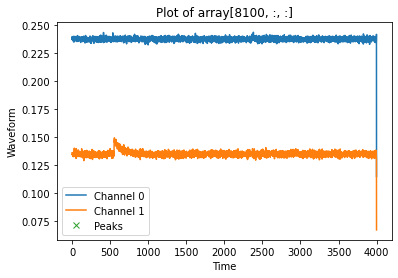

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 8100


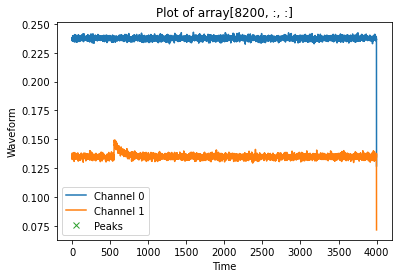

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 8200


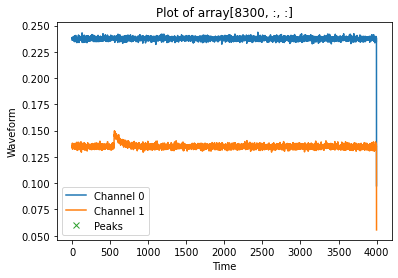

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 8300


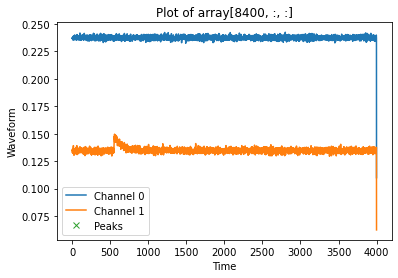

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 8400


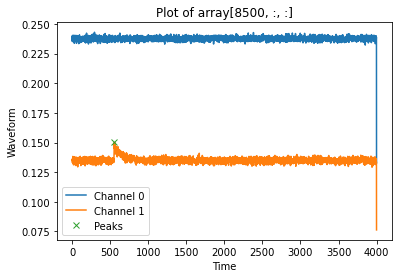

Indices of negative peaks: [553]
Values of negative peaks: [0.15012207]
Indices of event number: 8500


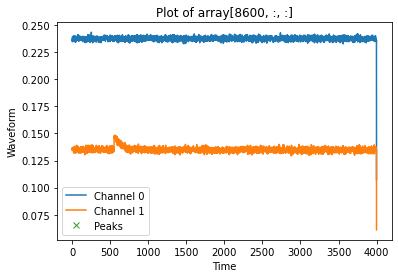

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 8600


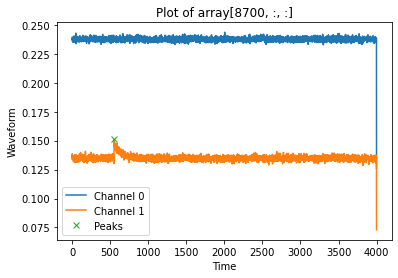

Indices of negative peaks: [552]
Values of negative peaks: [0.15106201]
Indices of event number: 8700


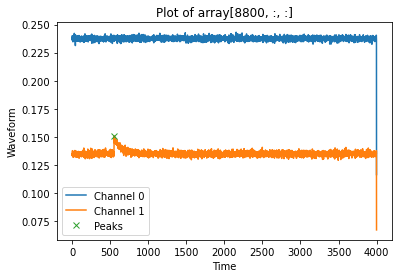

Indices of negative peaks: [552]
Values of negative peaks: [0.15080566]
Indices of event number: 8800


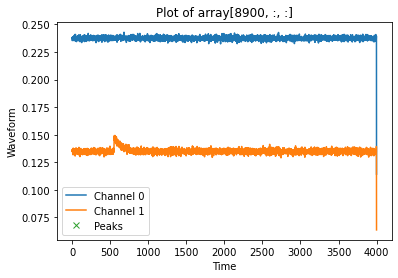

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 8900


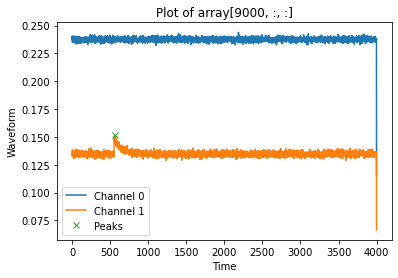

Indices of negative peaks: [562]
Values of negative peaks: [0.15136719]
Indices of event number: 9000


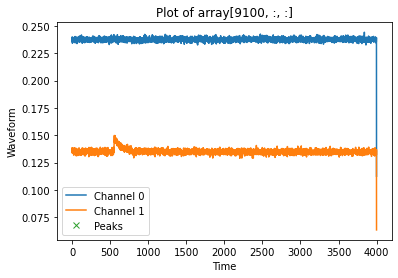

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 9100


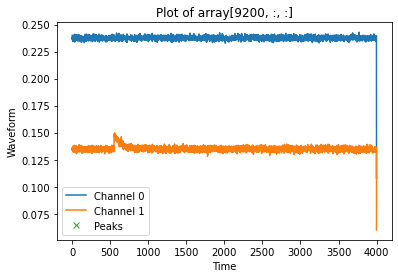

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 9200


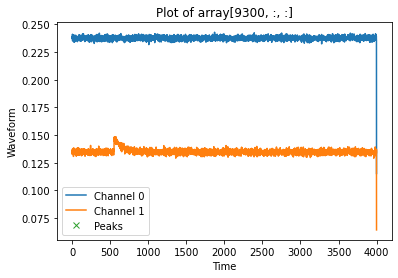

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 9300


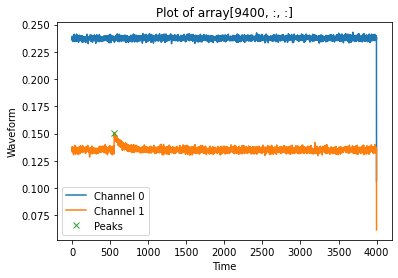

Indices of negative peaks: [553]
Values of negative peaks: [0.15067139]
Indices of event number: 9400


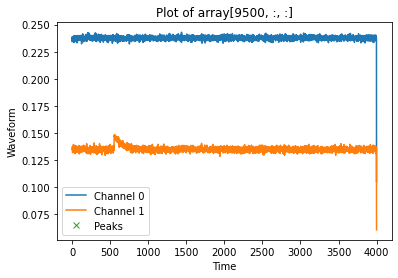

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 9500


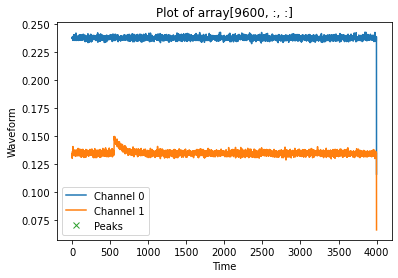

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 9600


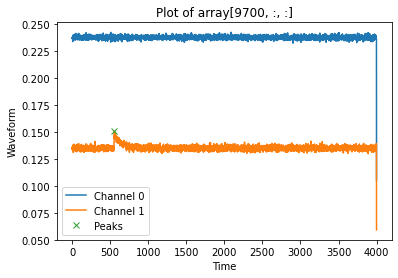

Indices of negative peaks: [556]
Values of negative peaks: [0.15054932]
Indices of event number: 9700


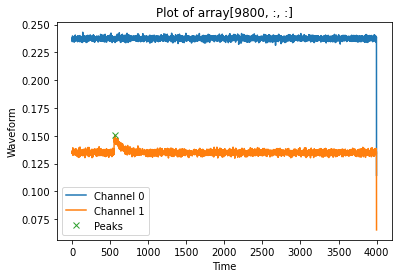

Indices of negative peaks: [560]
Values of negative peaks: [0.15043945]
Indices of event number: 9800


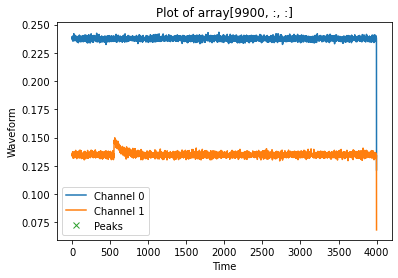

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 9900


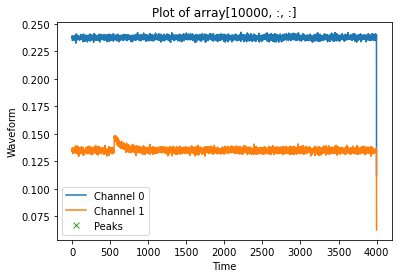

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 10000


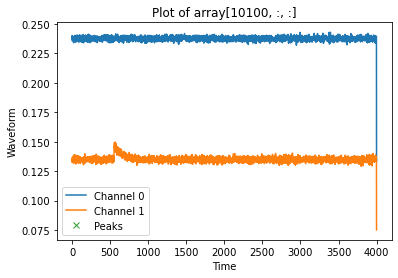

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 10100


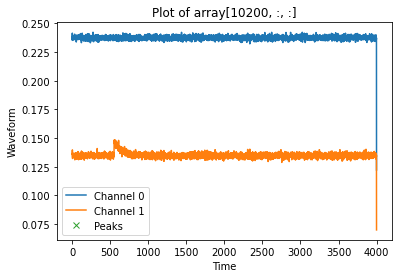

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 10200


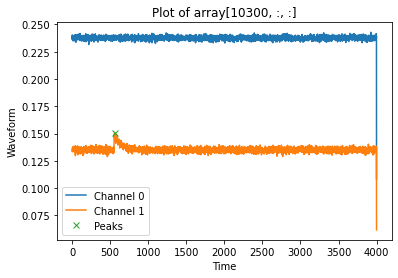

Indices of negative peaks: [558]
Values of negative peaks: [0.15092773]
Indices of event number: 10300


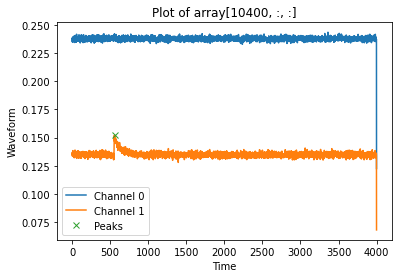

Indices of negative peaks: [558]
Values of negative peaks: [0.15209961]
Indices of event number: 10400


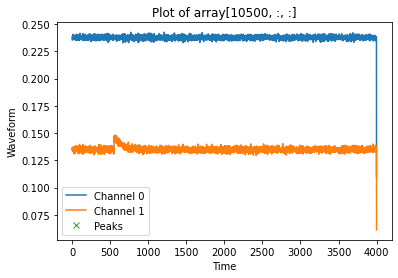

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 10500


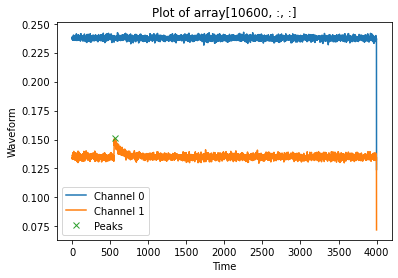

Indices of negative peaks: [557]
Values of negative peaks: [0.15091553]
Indices of event number: 10600


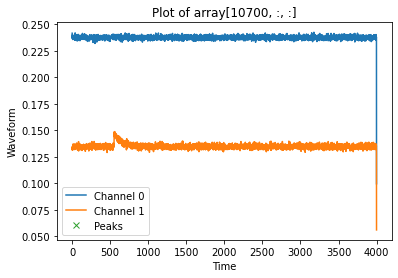

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 10700


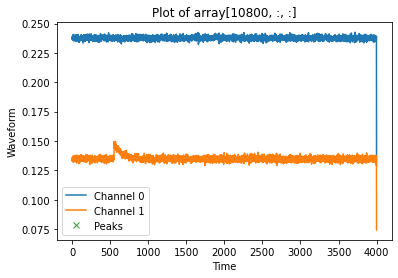

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 10800


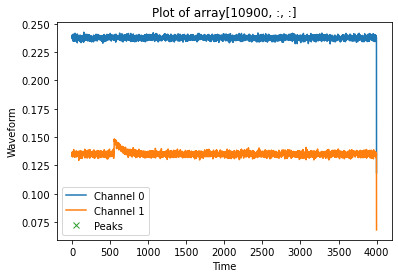

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 10900


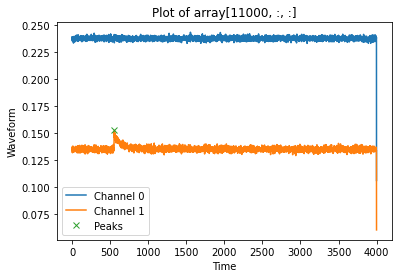

Indices of negative peaks: [556]
Values of negative peaks: [0.15224609]
Indices of event number: 11000


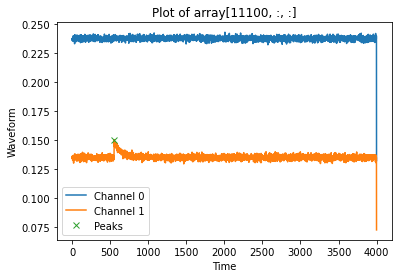

Indices of negative peaks: [553]
Values of negative peaks: [0.15012207]
Indices of event number: 11100


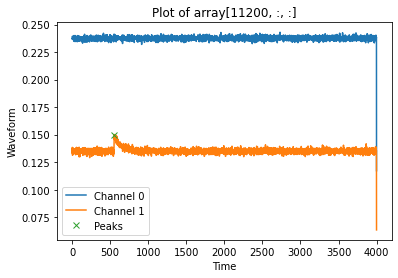

Indices of negative peaks: [552]
Values of negative peaks: [0.15010986]
Indices of event number: 11200


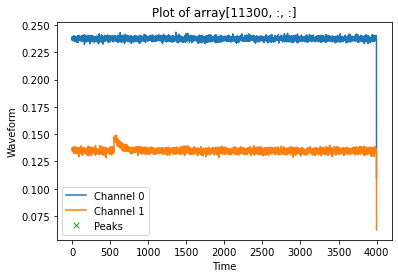

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 11300


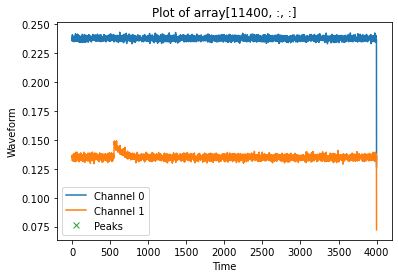

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 11400


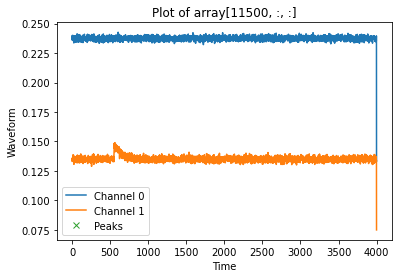

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 11500


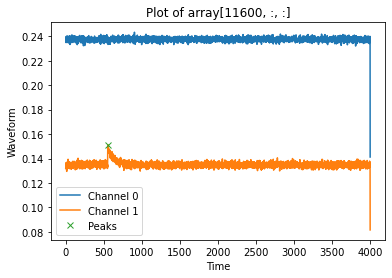

Indices of negative peaks: [558]
Values of negative peaks: [0.15113525]
Indices of event number: 11600


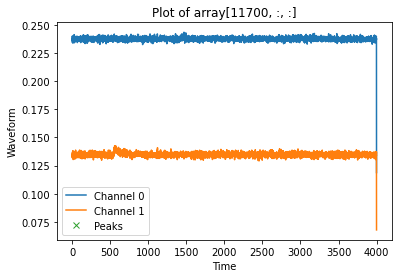

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 11700


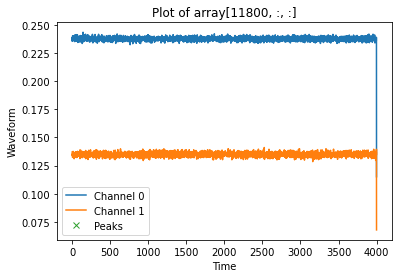

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 11800


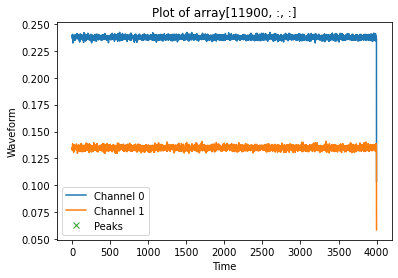

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 11900


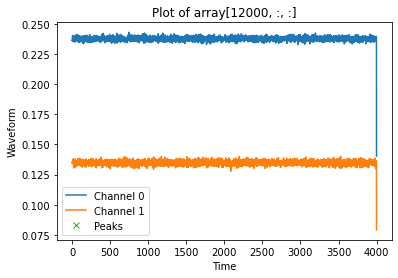

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 12000


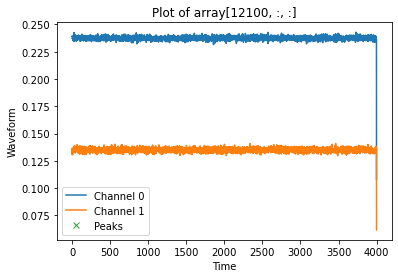

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 12100


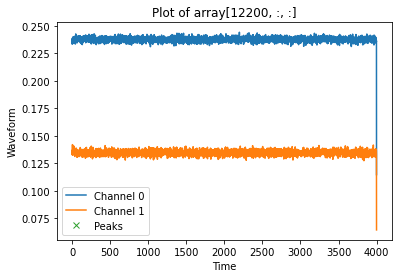

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 12200


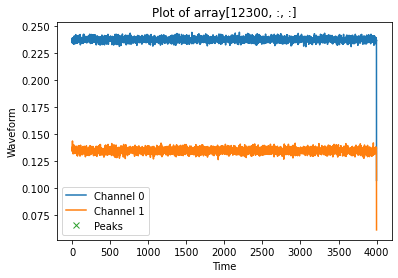

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 12300


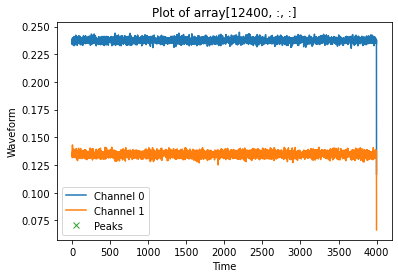

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 12400


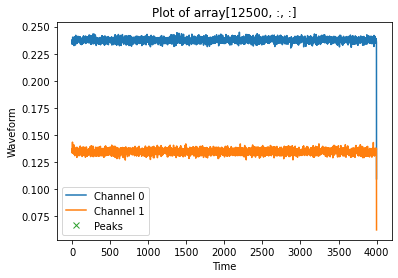

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 12500


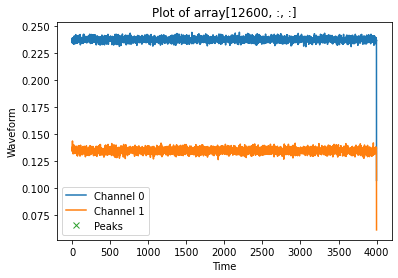

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 12600


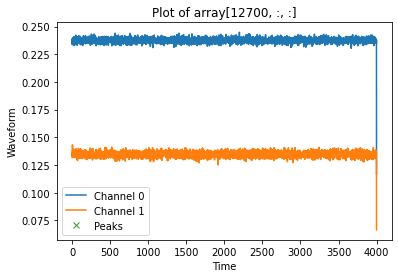

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 12700


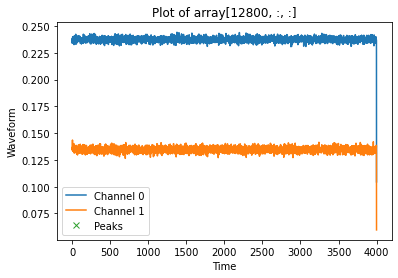

Indices of negative peaks: []
Values of negative peaks: []
Indices of event number: 12800


In [8]:
avg_nEvents = 100

total_events = len(acq01_mean)
height_threshold = .15
distance_between_peaks = 50

for start in range(0,total_events, avg_nEvents):
    end = start + avg_nEvents
    #print("start", start)
    #print("end", end)
   
    waveforms_subset_0 = acq01_data[start:end, 0, :]
    waveforms_subset_1 = acq01_data[start:end, 1, :]
    average_waveform_0 = np.mean(waveforms_subset_0, axis=0)
    average_waveform_1 = -np.mean(waveforms_subset_1, axis=0)
    
    peaks1, properties = find_peaks(average_waveform_1, height=height_threshold, distance=distance_between_peaks) 
    

       
    
    plt.plot(average_waveform_0, label=f'Channel {0}')
    plt.plot(average_waveform_1, label=f'Channel {1}')
    plt.plot(peaks1, average_waveform_1[peaks1], "x", label='Peaks')
   

    plt.title(f'Plot of array[{start}, :, :]')
    plt.xlabel('Time')
    plt.ylabel('Waveform')
    plt.legend()
    plt.show()
    
    #if average_waveform_1[peaks1] > height_threshold:
    print(f'Indices of negative peaks: {peaks1}')
    print(f'Values of negative peaks: {average_waveform_1[peaks1]}')
    print(f'Indices of event number: {start}')
    
    event_num = []
    #if average_waveform_1[peaks1] > height_threshold:
    #    event_num.append(start)

#print("event_num array", event_num)
        
     
    
    
    